## lab2 ASSIGNMENT
## Name: Ayodele Awoleye
## Student id: 8900611

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score

# lets load the data file 

In [5]:
data = pd.read_csv("Lab2_dataset.csv")


In [6]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


#let train our data using train test

In [8]:
X = data['text']
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#let us used our gaussianusing our data for the model

In [11]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train_vectorized.toarray(), y_train)


GaussianNB()

In [12]:
gaussian_predictions = gaussian_model.predict(X_test_vectorized.toarray())

In [13]:
gaussian_accuracy = accuracy_score(y_test, gaussian_predictions)

In [14]:
print(gaussian_accuracy)

0.9545893719806763


# let us consider multinomial model

In [15]:
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train_vectorized, y_train)

MultinomialNB()

# to test the multinomial model

In [16]:
multinomial_predictions = multinomial_model.predict(X_test_vectorized)

#to test y Accuracy

In [19]:
multinomial_accuracy = accuracy_score(y_test, multinomial_predictions)

In [20]:
print(multinomial_accuracy)

0.9719806763285024


In [21]:
print("GaussianNB accuracy:", gaussian_accuracy)
print("MultinomialNB accuracy:", multinomial_accuracy)

GaussianNB accuracy: 0.9545893719806763
MultinomialNB accuracy: 0.9719806763285024


## After testing  the two mothod we arrive at this:GaussianNB accuracy: 0.9545893719806763
## MultinomialNB accuracy: 0.9719806763285024 
## My Conclusions About Part 1 of the Problem Statement
# We can clearly see that Multinomial Naive Bayes has created a higher accuracy on the text data in comparison to Gaussian Naive Bayes since, as was shown previously, it works excellent with discrete data as well as text data.
# Additionally, the confusion matrix can be compared as follows:
# Multinomial Naive Bayes correctly predicted 721 true negatives as opposed to 718 by Gaussian NB.
# False Positive Count: Multinomial NB has 11 false positives.


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

# importing the data set

In [25]:
data = pd.read_csv("AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
data.shape
data.decribe()

## let examining the five summary statistics for price variation

In [27]:
summary_price = pd.DataFrame(data['price'].describe())
summary_price

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


## counting the number of values that are above the 99th percentile

In [30]:
quantile1, quantile3= np.percentile(data['price'],[25,75])


## Price for 25th percentile

In [31]:
quantile1

69.0

## Price 75th percentile

In [32]:
quantile3

175.0

## to get the IQR

In [33]:
IQR=quantile3-quantile1

In [34]:
# Visualising a variable price

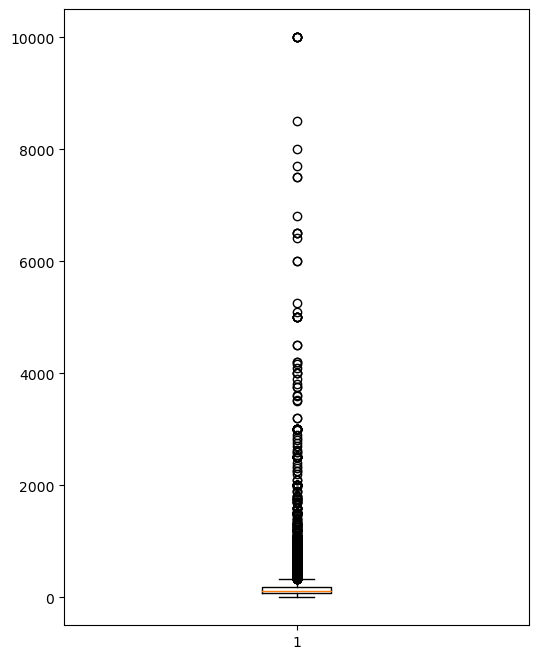

In [38]:
fig = plt.figure(figsize =(6,8))
plt.boxplot(data['price'])
plt.show()

<Axes: xlabel='price', ylabel='Density'>

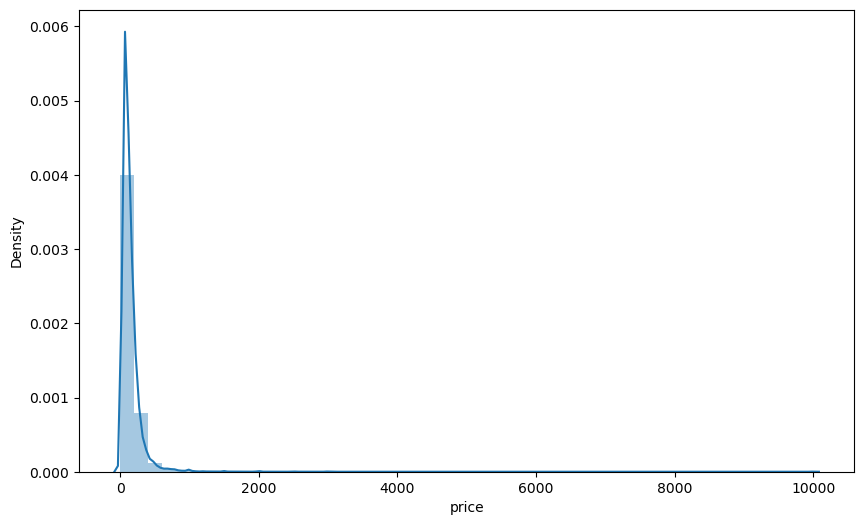

In [39]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize =(10,6))
sns.distplot(data['price'])

# Calculate Q1 and Q3

In [41]:
Quartile_1 = data['price'].quantile(0.25)
Quartile_3 = data['price'].quantile(0.75)

In [42]:
## IQR

In [43]:
Interquartile_range = Quartile_3 - Quartile_1

In [ ]:
# visualising column pricing following IQ treatment

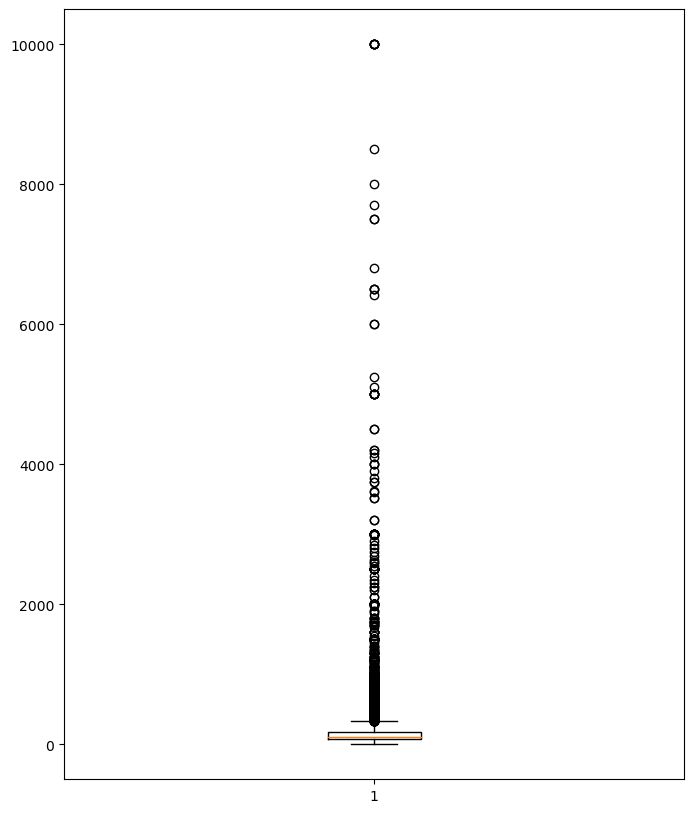

In [55]:
fig = plt.figure(figsize =(8,10))
plt.boxplot(data['price'])
plt.show()

<Axes: xlabel='price', ylabel='Density'>

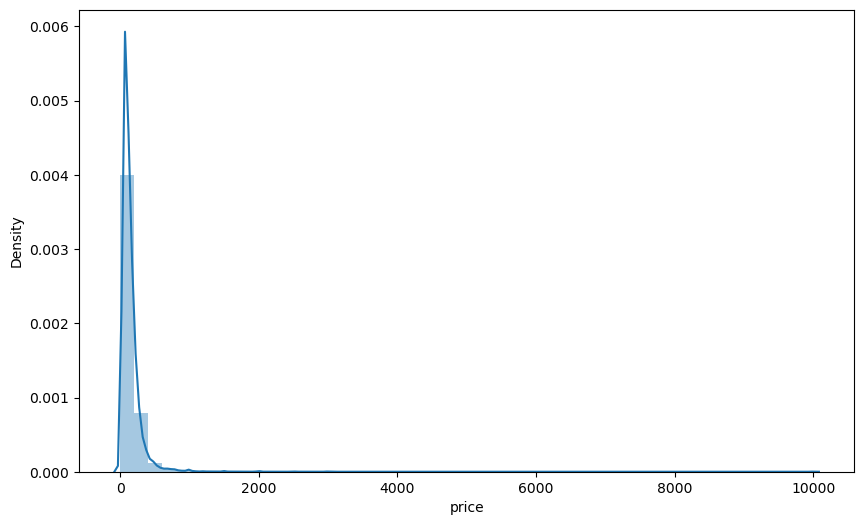

In [57]:
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize =(10,6))
sns.distplot(data['price'])

<Axes: xlabel='price', ylabel='Count'>

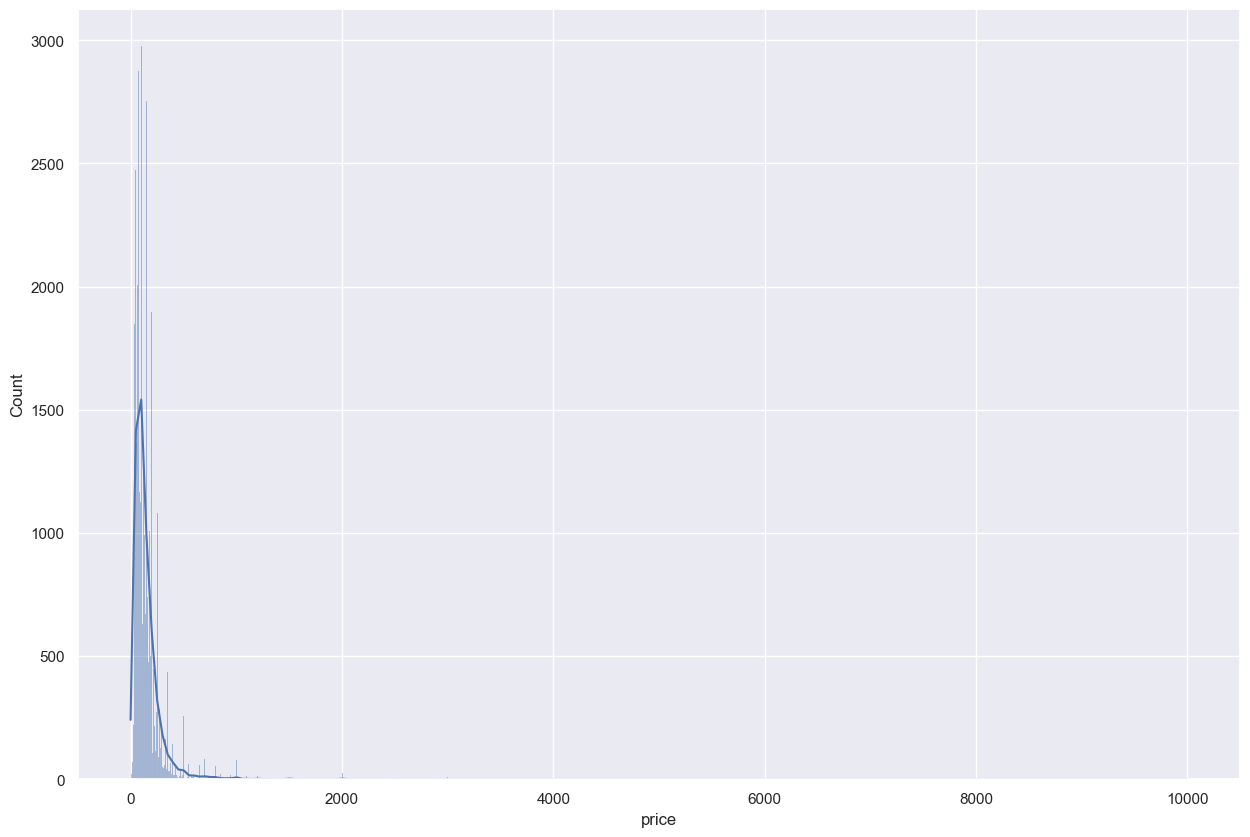

In [61]:
sns.set(style="darkgrid", rc={'figure.figsize':(15,10)}) 
sns.histplot(data=data, x='price', kde=True)

## My deductions
Outsider detection In order to find outliers in our dataset, we employed two different techniques: visulization and summary function. The describe() function makes it easier for us to comprehend the five summary statistics of our dataset and the distribution of the data. Because this is a dataset from AirBnB, there is a potential that certain homes may be expensive properties, as shown by the dramatic climb in prices after the 75th percentile in the describe function for variable price. So, there are numerous methods we can employ to handle these outliers. Therefore, IQR, mean, median, and other standard approaches are used. However, the reason I skipped using these method